In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from collections import Counter
import datetime
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

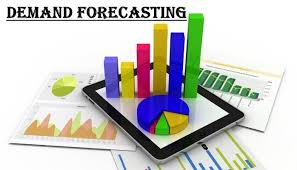

In [ ]:
train = pd.read_csv('/kaggle/input/demand-forecasting/train_0irEZ2H.csv') 
test = pd.read_csv('/kaggle/input/demand-forecasting/test_nfaJ3J5.csv')
sample = pd.read_csv('/kaggle/input/demand-forecasting/sample_submission_pzljTaX.csv')

# sku - stock-keeping unit

Change week to date time

In [ ]:
train['week'] = pd.to_datetime(train['week'])
test['week'] = pd.to_datetime(test['week'])

# Exploratory data analysis

In [ ]:
train.isna().sum()

In [ ]:
test.isna().sum()

In [ ]:
train.apply(lambda x: len(x.unique()))

In [ ]:
test.apply(lambda x: len(x.unique()))

In [ ]:
print(train['is_featured_sku'].value_counts()/train['is_featured_sku'].shape[0])

print(test['is_featured_sku'].value_counts()/test['is_featured_sku'].shape[0])

In [ ]:
print(train['is_display_sku'].value_counts()/train['is_display_sku'].shape[0])

print(test['is_display_sku'].value_counts()/test['is_display_sku'].shape[0])

Conclusion - Balanced data set

In [ ]:
train.info()

In [ ]:
test.info()

is_featured_sku and is_display_sku -> Units  = 1

In [ ]:
train.columns

In [ ]:
start = []
end = []
ct = 0
for store in list(set(train['store_id'])):
    temp_of_train = train[train['store_id'] == store]
    temp_of_test = test[test['store_id'] == store]
    for sku in list(set(temp_of_train['sku_id'])):
        
        train_df = temp_of_train[temp_of_train['sku_id'] == sku]
        test_df = temp_of_test[temp_of_test['sku_id'] == sku]
        
        train_df.sort_values("week")
        test_df.sort_values("week")
        print(store,sku)
        print(train_df['week'].iloc[-1])
        start.append(train_df['week'].iloc[-1])
        print(test_df['week'].iloc[0])
        end.append(test_df['week'].iloc[0])
        print(test_df)
        
        
        ct+=1

In [ ]:
print(Counter(start))
print(Counter(end))

For each store and sku pair, the start and end is same

end of train - 2013-09-07


start of test - 2013-07-23

Same store and same sku_id in both test and train

# Data Visualization

In [ ]:
train.groupby('week').sum()['units_sold'].plot(figsize=(12,8))
plt.xlabel('Week')
plt.ylabel('units_sold')

In [ ]:
train.groupby('week').sum()['total_price'].plot(figsize=(12,8))
plt.xlabel('Week')
plt.ylabel('total_price')

In [ ]:
train.groupby('store_id').sum()['units_sold'].plot(figsize=(15,8),kind='bar')
plt.xlabel('store_id')
plt.ylabel('units_sold')

In [ ]:
train.groupby(['store_id','sku_id']).mean()['units_sold'].sort_values().plot(figsize=(15,8),kind='bar')

plt.xlabel('store_id')
plt.ylabel('units_sold')

In [ ]:
import seaborn as sns
sns.distplot(train['total_price'])

# Handling missing values

In [ ]:
train.isna().sum()

One missing value

In [ ]:
train[train['total_price'].isna() == True]

In [ ]:
train[(train['store_id']==9436) & (train['sku_id']==245338) ].set_index('week')['total_price'].plot()

In [ ]:
train[(train['store_id']==9436) & (train['sku_id']==245338) & (train['week'] >= datetime.datetime.strptime('2013-04-23', '%Y-%M-%d'))]

Interpolating the value

In [ ]:
train = train.fillna(475)

In [ ]:
train.isna().sum()

# Data preprocessing 

In [ ]:
df = train.append(test)

In [ ]:
df.shape

In [ ]:
column=['sku_id','store_id']
name='count_id_sku_store'
temp=df.groupby(column)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
temp
df = pd.merge(df,temp,how = 'left',on = column)
df[name] = df[name].astype(float)
df[name].fillna(np.median(temp[name]),inplace=True)

In [ ]:
column = ['sku_id']
name='count_id_sku'
temp=df.groupby(column)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
temp
df = pd.merge(df,temp,how = 'left',on = column)
df[name] = df[name].astype(float)
df[name].fillna(np.median(temp[name]),inplace=True)

In [ ]:
column = ['store_id']
name='count_id_store'
temp=df.groupby(column)['record_ID'].count().reset_index().rename(columns={'record_ID':name})
temp
df = pd.merge(df,temp,how = 'left',on = column)
df[name] = df[name].astype(float)
df[name].fillna(np.median(temp[name]),inplace=True)

In [ ]:
df['price_diff_percent'] = (df['base_price'] - df['total_price']) / df['base_price']

Week

In [ ]:
df['Month'] = pd.to_datetime(df['week']).dt.month

df['Day'] = pd.to_datetime(df['week']).dt.day

df['Dayofweek'] = pd.to_datetime(df['week']).dt.dayofweek

df['DayOfyear'] = pd.to_datetime(df['week']).dt.dayofyear

df['Week'] = pd.to_datetime(df['week']).dt.week

df['Quarter'] = pd.to_datetime(df['week']).dt.quarter 

df['Is_month_start'] = pd.to_datetime(df['week']).dt.is_month_start

df['Is_month_end'] = pd.to_datetime(df['week']).dt.is_month_end

df['Is_quarter_start'] = pd.to_datetime(df['week']).dt.is_quarter_start

df['Is_quarter_end'] = pd.to_datetime(df['week']).dt.is_quarter_end

df['Is_year_start'] = pd.to_datetime(df['week']).dt.is_year_start

df['Is_year_end'] = pd.to_datetime(df['week']).dt.is_year_end

df['Is_weekday'] = np.where(df['week'].isin([0,1,2,3,4]),1,0)

In [ ]:
df

Label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
df.dtypes

In [ ]:
df.select_dtypes(exclude=["int","float"]).columns

In [ ]:
col=['store_id','sku_id','Is_month_start','Is_month_end','Is_quarter_start','Is_quarter_end','Is_year_start','Is_year_end']

In [ ]:
for i in col:
    df = pd.get_dummies(df, columns=[i])

In [ ]:
df

In [ ]:
df.drop(['record_ID','week'],inplace=True,axis=1)

In [ ]:
df.head()

In [ ]:
import seaborn as sns
sns.distplot(df['total_price'])

In [ ]:
df['total_price']=np.log1p(df['total_price'])
df['base_price']=np.log1p(df['base_price'])
df['units_sold'] = np.log1p(df['units_sold'])

In [ ]:
sns.distplot(df['total_price'])

In [ ]:
tests = df[df['units_sold'].isna() == True]
trains = df[df['units_sold'].isna() == False]

In [ ]:
print(trains.shape,tests.shape)

In [ ]:
del tests['units_sold']

In [ ]:
trains.corr()

In [ ]:
X = trains.drop('units_sold',axis = 1)
Y = train['units_sold']

In [ ]:
# Perform cross-validation
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold

In [ ]:
x_train, x_valid, y_train, y_valid = train_test_split(X, Y, test_size = 0.2,random_state=23)

In [ ]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [ ]:
rf_base = RandomForestRegressor()
rf_base.fit(x_train,y_train)


rf_tuned = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=True, random_state=None,
                      verbose=0, warm_start=False)
rf_tuned.fit(x_train,y_train)

In [ ]:
import lightgbm as lgb

In [ ]:
model_lgb_base=lgb.LGBMRegressor(objective='regression')
model_lgb_base.fit(x_train,y_train)

model_lgb_tuned=lgb.LGBMRegressor(bagging_fraction=0.8, bagging_frequency=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.1, max_depth=30,
              min_child_samples=20, min_child_weight=30, min_data_in_leaf=70,
              min_split_gain=0.0001, n_estimators=200, n_jobs=-1,
              num_leaves=1200, objective=None, random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

model_lgb_tuned.fit(x_train,y_train)

In [ ]:
def rmlse(y_true, y_pred):
    return np.sqrt(np.mean(np.power(np.log1p(y_true)-np.log1p(y_pred), 2)))

In [ ]:
prediction_rfb_valid=rf_base.predict(x_valid)
prediction_rft_valid=rf_tuned.predict(x_valid)
prediction_lgbmb_valid=model_lgb_base.predict(x_valid)
prediction_lgbmt_valid=model_lgb_tuned.predict(x_valid)

rf_base_msle=100*rmlse(y_valid,prediction_rfb_valid)
rf_tuned_msle=100*rmlse(y_valid,prediction_rft_valid)
lgbm_base_msle=100*rmlse(y_valid,prediction_lgbmb_valid)
lgbm_tuned_msle=100*rmlse(y_valid,prediction_lgbmt_valid)

prediction_ensemble_base=(((1-rf_base_msle)*prediction_rfb_valid)+((1-lgbm_base_msle)*prediction_lgbmb_valid))/(2-rf_base_msle-lgbm_base_msle)
prediction_ensemble_tuned=(((1-rf_tuned_msle)*prediction_rft_valid)+((1-lgbm_tuned_msle)*prediction_lgbmt_valid))/(2-rf_tuned_msle-lgbm_tuned_msle)

ensemble_base_msle=100*rmlse(y_valid,prediction_ensemble_base)
ensemble_tuned_msle=100*rmlse(y_valid,prediction_ensemble_tuned)


print("RF Base: {}; RF Tuned: {}".format(rf_base_msle,rf_tuned_msle))
print("LGBM Base: {}; LGBM Tuned: {}".format(lgbm_base_msle,lgbm_tuned_msle))
print("Ensemble Base: {}; Ensemble Tuned: {}".format(ensemble_base_msle,ensemble_tuned_msle))

In [ ]:
model = lgb.LGBMRegressor(bagging_fraction=0.8, bagging_frequency=4, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
              importance_type='split', learning_rate=0.1, max_depth=30,
              min_child_samples=20, min_child_weight=30, min_data_in_leaf=70,
              min_split_gain=0.0001, n_estimators=100, n_jobs=-1,
              num_leaves=1400, objective=None, random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

model.fit(X,Y)

In [ ]:
prediction=model.predict(tests)

In [ ]:
final_prediction=np.round(np.expm1(prediction))
sample['units_sold']=final_prediction


In [ ]:
sample['units_sold'] = sample['units_sold'].abs()

In [ ]:
sample.to_csv('submissions.csv',index=False,encoding='utf-8')

Model - Another approach

In [ ]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(x_train, y_train)

In [ ]:
def RMSLE(actual, predicted):

    predicted = np.array([np.log(np.abs(x+1.0)) for x in predicted])  # doing np.abs for handling neg values  
    actual = np.array([np.log(np.abs(x+1.0)) for x in actual])
    log_err = actual-predicted
    
    return 1000*np.sqrt(np.mean(log_err**2))

In [ ]:
preds = reg.predict(tests)
#print(f'The validation RMSLE error for baseline model is: {RMSLE(np.exp(x_valid), np.exp(preds))}')

In [ ]:
print(preds)

In [ ]:
final_prediction_rf=np.round((preds))
sample['units_sold']=final_prediction_rf
sample['units_sold']
sample['units_sold'] = sample['units_sold'].abs()
sample.to_csv('submissions_base.csv',index=False,encoding='utf-8')

Rank - 75

In [ ]:
Xtrain, Xval, ytrain, yval = train_test_split(X, Y, test_size = 0.2, random_state = 1)
print(Xtrain.shape, ytrain.shape, Xval.shape, yval.shape)

In [ ]:
def runLGB(Xtrain, ytrain, Xval, yval, cat_cols, Xtest = None):
    params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l1',
    #'max_depth': 9, 
    'learning_rate': 0.1
    ,'verbose': 1
    , "min_data_in_leaf" : 10
    }

    n_estimators = 800
    early_stopping_rounds = 10

    d_train = lgb.Dataset(Xtrain.copy(), label=ytrain.copy(), categorical_feature=cat_cols)
    d_valid = lgb.Dataset(Xval.copy(), label=yval.copy(), categorical_feature=cat_cols)
    watchlist = [d_train, d_valid]
    model = lgb.train(params, d_train, n_estimators
                      , valid_sets = [d_train, d_valid]
                      , verbose_eval=n_estimators
                      , early_stopping_rounds=early_stopping_rounds)

    preds = model.predict(Xval, num_iteration=model.best_iteration)
    err = RMSLE(yval, np.exp(preds))
    
    preds_test = model.predict(Xtest, num_iteration=model.best_iteration)
    return  preds, err, np.exp(preds_test), model

In [ ]:
pred_val, err, pred_test,model = runLGB(Xtrain, ytrain, Xval, yval, list(X.select_dtypes(exclude=["int","float"]).columns), tests)

In [ ]:

final_prediction=np.round(np.expm1(pred_test))
sample['units_sold'] = final_prediction
sample.to_csv('lgb_v1.csv', index = False)